<a href="https://colab.research.google.com/github/Venkatpandey/DataScience_ML/blob/main/featureSelection/PCA_z_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA - Principal Component Analysis**
Used in Feature selection:- Helps getting rid of Non-Important feature, by reducing its dimentions.


*   Scale The feature before applying PCA
*   Expect Some accuracy drop after applying PCA







In [118]:
import pandas as pd
import numpy as np
import seaborn as sns

*Data taken from https://www.kaggle.com/fedesoriano/heart-failure-prediction*

In [119]:
data = pd.read_csv('https://raw.githubusercontent.com/Venkatpandey/DataScience_ML/main/dataset/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [120]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


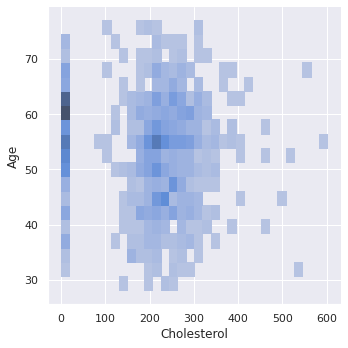

In [121]:
sns.set_theme()
sns.displot(x = data['Cholesterol'], y = data['Age'])

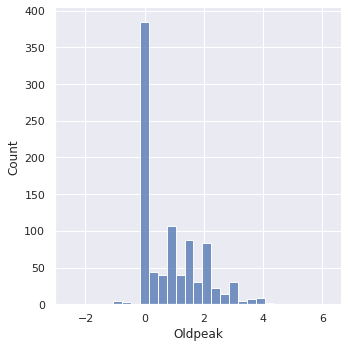

In [122]:
sns.displot(data['Oldpeak'])

In [123]:
from scipy import stats
def detect_outliers(col):
  z = np.abs(stats.zscore(col))
  idx_outlier = np.where(z>3, True,False)
  return pd.Series(idx_outlier, index=col.index)

In [124]:
idx = detect_outliers(data['Oldpeak'])
print(idx)

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool


In [125]:
display(data.loc[idx==True].describe().round(3))

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,7.000,7.000,7.000,7.000,7.000,7.000,7.000
mean,54.429,138.857,214.000,0.143,133.714,3.857,0.857
std,5.682,26.175,107.705,0.378,12.829,2.946,0.378
min,46.000,100.000,0.000,0.000,111.000,-2.600,0.000
25%,50.500,127.000,190.500,0.000,127.500,4.200,1.000
50%,55.000,140.000,231.000,0.000,140.000,4.400,1.000
75%,58.500,150.000,284.000,0.000,142.500,5.300,1.000
max,62.000,178.000,318.000,1.000,145.000,6.200,1.000


In [126]:
print(data.loc[idx==False])

     Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0     40   M           ATA  ...      0.0        Up             0
1     49   F           NAP  ...      1.0      Flat             1
2     37   M           ATA  ...      0.0        Up             0
3     48   F           ASY  ...      1.5      Flat             1
4     54   M           NAP  ...      0.0        Up             0
..   ...  ..           ...  ...      ...       ...           ...
913   45   M            TA  ...      1.2      Flat             1
914   68   M           ASY  ...      3.4      Flat             1
915   57   M           ASY  ...      1.2      Flat             1
916   57   F           ATA  ...      0.0      Flat             1
917   38   M           NAP  ...      0.0        Up             0

[911 rows x 12 columns]


# **Encode All text datapoints**

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [128]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [129]:
dfle = data
dfle.Sex = le.fit_transform(dfle.Sex)
dfle.ChestPainType = le.fit_transform(dfle.ChestPainType)
dfle.RestingECG = le.fit_transform(dfle.RestingECG)
dfle.ExerciseAngina = le.fit_transform(dfle.ExerciseAngina)
dfle.ST_Slope = le.fit_transform(dfle.ST_Slope)
dfle.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


In [161]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
xct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto', drop='first'), [1,2,6,8,10,11])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)


In [163]:
x_train = xct.fit_transform(dfle)

display(x_train.shape)

(918, 16)

## **Lets Automate oulier detection for all columns in DataFrame**

In [164]:
df_outliers = pd.DataFrame()
data_x = pd.DataFrame(x_train)
#display(data_x.describe().columns)

for col in data_x.describe().columns:
  df_outliers[col] = detect_outliers(data_x[col])

df_outliers.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [165]:
test_outLiers = df_outliers.apply(lambda x: np.any(x), axis=1)
print(len(test_outLiers), df_outliers.shape)

918 (918, 16)


In [147]:
print(test_outLiers)

0      False
1      False
2      False
3      False
4      False
       ...  
913     True
914    False
915    False
916    False
917    False
Length: 918, dtype: bool


**Clean dataset with detected outliers**

In [169]:
clean_x_train = data_x.loc[test_outLiers==False]
print(clean_x_train.head())

    0    1    2    3    4    5    6   ...    9      10     11   12     13   14   15
0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  40.0  140.0  289.0  0.0  172.0  0.0  0.0
1  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  49.0  160.0  180.0  0.0  156.0  1.0  1.0
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  37.0  130.0  283.0  0.0   98.0  0.0  0.0
3  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  48.0  138.0  214.0  0.0  108.0  1.5  1.0
4  1.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  54.0  150.0  195.0  0.0  122.0  0.0  0.0

[5 rows x 16 columns]


In [177]:
ytr = clean_x_train[15]
print(ytr)
xtr = clean_x_train.drop(labels=15, axis=1)
print(xtr)

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
912    1.0
914    1.0
915    1.0
916    1.0
917    0.0
Name: 15, Length: 854, dtype: float64
      0    1    2    3    4    5   ...    9      10     11   12     13   14
0    1.0  1.0  0.0  0.0  1.0  0.0  ...  40.0  140.0  289.0  0.0  172.0  0.0
1    0.0  0.0  1.0  0.0  1.0  0.0  ...  49.0  160.0  180.0  0.0  156.0  1.0
2    1.0  1.0  0.0  0.0  0.0  1.0  ...  37.0  130.0  283.0  0.0   98.0  0.0
3    0.0  0.0  0.0  0.0  1.0  0.0  ...  48.0  138.0  214.0  0.0  108.0  1.5
4    1.0  0.0  1.0  0.0  1.0  0.0  ...  54.0  150.0  195.0  0.0  122.0  0.0
..   ...  ...  ...  ...  ...  ...  ...   ...    ...    ...  ...    ...  ...
912  0.0  0.0  0.0  0.0  1.0  0.0  ...  57.0  140.0  241.0  0.0  123.0  0.2
914  1.0  0.0  0.0  0.0  1.0  0.0  ...  68.0  144.0  193.0  1.0  141.0  3.4
915  1.0  0.0  0.0  0.0  1.0  0.0  ...  57.0  130.0  131.0  0.0  115.0  1.2
916  0.0  1.0  0.0  0.0  0.0  0.0  ...  57.0  130.0  236.0  0.0  174.0  0.0
917  

# **Scaling the dataset**

In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [180]:
x_train_sca = scaler.fit_transform(xtr)
print(clean_x_train.shape)

(854, 16)


In [198]:
X_train, X_test, y_train, y_test = train_test_split(x_train_sca, ytr, test_size=0.2, random_state=42)

**Test Accuracy with Multiple Model**

In [199]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

model_param = {
    'svm' : {
        'model' : svm.SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20,30],
            'kernel' : ['rbf', 'linear']
        }
    },
    'random_forest' : {
      'model' : RandomForestClassifier(),
      'params' : {
          'n_estimators' : [1,5,10]
      }
    },
    'logistic_regressions' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'C' : [1,5,10]
        }
    },
    'gaussian' : {
        'model' : GaussianNB(),
        'params' : {
            'var_smoothing' : [1.0, 2.5]
        }
    },
    'decisionTree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [10]

        }
    }
}

In [200]:
scores = []
from sklearn.model_selection import GridSearchCV
for mn,mp in model_param.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(X_train, y_train)
  scores.append({
      'model' : mn,
      'best_score' : clf.best_score_
  })

print(pd.DataFrame(scores, columns=('model', 'best_score')))

                  model  best_score
0                   svm    0.874120
1         random_forest    0.855120
2  logistic_regressions    0.853650
3              gaussian    0.862419
4          decisionTree    0.796436


In [204]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
X_pca = pca.fit_transform(x_train_sca)
X_pca.shape

(854, 10)

In [205]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, ytr, test_size=0.2, random_state=42)

In [206]:
scores_pca = []
for mn,mp in model_param.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(X_train_pca, y_train_pca)
  scores_pca.append({
      'model' : mn,
      'best_score' : clf.best_score_
  })

print(pd.DataFrame(scores_pca, columns=('model', 'best_score')))

                  model  best_score
0                   svm    0.868280
1         random_forest    0.846286
2  logistic_regressions    0.858040
3              gaussian    0.852179
4          decisionTree    0.817024
